In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
data=pd.read_csv("Preprocessed_data.csv")
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [3]:
data.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Latitude',
       'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

In [4]:
X=data.drop("Customer Status",axis=1)
y=data['Customer Status']

In [5]:
X

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99


In [6]:
y

0       1
1       1
2       0
3       0
4       0
       ..
4830    0
4831    1
4832    0
4833    1
4834    1
Name: Customer Status, Length: 4835, dtype: int64

In [7]:
X.shape , y.shape

((4835, 30), (4835,))

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=1234)

print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [11]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [13]:
X_train.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
464,1,35,0,3,38.602723,-121.279913,0,49,0,4.76,1,2,58,1,1,1,0,1,1,1,1,1,1,1,109.20,5290.45,0.0,0,233.24,5523.69
3361,1,34,0,0,38.304194,-120.592431,0,50,0,15.37,0,2,22,1,1,1,1,0,0,0,1,1,1,1,90.10,4549.45,0.0,0,768.50,5317.95
2394,0,80,0,0,38.931425,-121.946081,0,36,3,41.57,1,2,10,0,0,0,0,0,0,0,1,2,1,0,74.90,2659.45,0.0,0,1496.52,4155.97
2691,1,21,0,0,41.486953,-120.913975,0,1,0,39.19,0,1,69,0,0,0,0,0,1,1,0,0,1,0,55.25,55.25,0.0,60,39.19,154.44
1651,1,60,0,0,37.212191,-119.749323,0,68,1,1.27,1,0,13,1,1,1,0,0,1,1,1,1,1,1,76.90,5023.00,0.0,0,86.36,5109.36


In [16]:
y_train.head()

464     1
3361    1
2394    1
2691    1
1651    1
Name: Customer Status, dtype: int64

### With out hyperparameter tuning

**Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred_dt=dtree.predict(X_test)
y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [23]:
print(y_pred_dt[:10])
print(y_test.values[:10])

[1 1 1 1 1 1 1 1 0 1]
[0 1 0 0 1 1 1 0 1 1]


In [25]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
acc_dt

74.04

In [33]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred_dt).ravel()
print(tn, fp, fn, tp)
print(199+521)
acc=(tn+tp)/(tn+tp+fp+fn)
precission=tp/(tp+fp)
recall=tp/(tp+tn)
f1=(2*precission*recall)/(precission*recall)
print(acc,precission,recall,f1)

192 116 135 524
720
0.7404343329886246 0.81875 0.7318435754189944 2.0


In [29]:
cmt=confusion_matrix(y_test,y_pred_dt)
cmt

array([[192, 116],
       [135, 524]], dtype=int64)

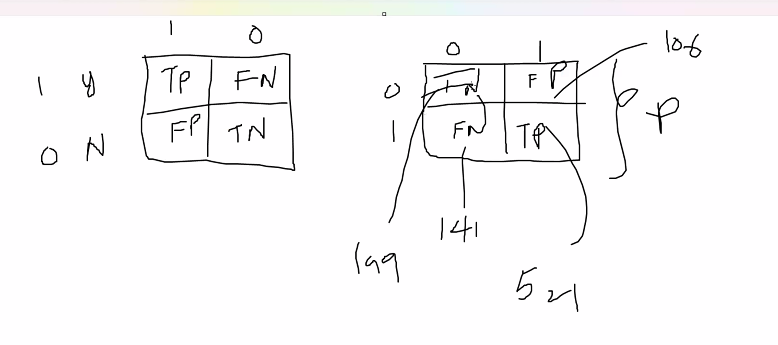

In [35]:
print(accuracy_score(y_test,y_pred_dt))
print(precision_score(y_test,y_pred_dt))
print(recall_score(y_test,y_pred_dt))
print(f1_score(y_test,y_pred_dt))
print("")
print(acc,precission,recall,f1)

0.7404343329886246
0.81875
0.795144157814871
0.8067744418783679

0.7404343329886246 0.81875 0.7318435754189944 2.0


In [36]:
cmt=confusion_matrix(y_test,y_pred_dt)

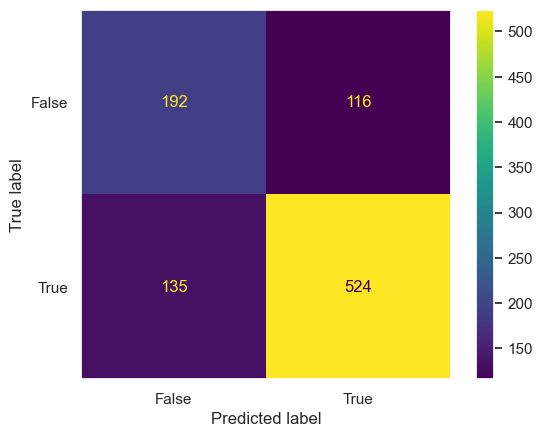

In [39]:
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [41]:
y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [42]:
dtree.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [45]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
y_dt_pred_prob

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0.

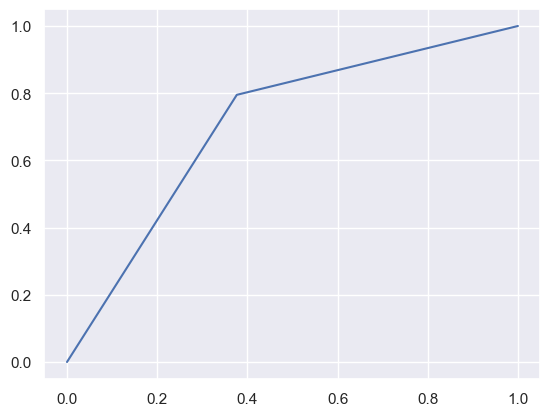

In [46]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

In [4]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()

NBtree.get_params()

{'priors': None, 'var_smoothing': 1e-09}